In [1]:
# Import libraries
import numpy as np
import pandas as pd
import re
import torch
#import matplotlib.pyplot as plt
import fastai.tabular.all as fastai

# clean up data: area, date, floor, price
def load_csv():
  return pd.read_csv('./data/resale-flat-from-jan-2017.csv')
floor_dict = { f'0{i*3+1} TO 0{i*3+3}' if i < 3 else f'{i*3+1} TO {i*3+3}': i*3+2  for i in range(17)  }
def floor_cleanup(df):
  df['floor'] = df.storey_range.apply(lambda x:float(floor_dict[x]) if isinstance(x,str) else x)
  df.drop(['storey_range'], axis=1, inplace=True)
  return df
date_dict = { f'20{17+i}-0{j+1}' if j < 9 else f'20{17+i}-{j+1}': i*12+j  for i in range(7) for j in range(12)  }
def date_cleanup(df):
  df['date'] = df.month.apply(lambda x:float(date_dict[x]) if isinstance(x,str) else x)
  df.drop(['month'], axis=1, inplace=True)
  return df
def load_and_cleanup():
  df = load_csv()
  df = floor_cleanup(df)
  df = date_cleanup(df)
  return df

#def price_cleanup(df):
#  df['price'] = df.price.apply(lambda x:float(x.replace('$','').replace(',','')) if isinstance(x,str) else x)
#  return df
#def area_cleanup(df):
#  df['area'] = df.area.str.split('\n',expand=True)[0].astype(float) if df.area.dtype != 'float64' else df.area
#  return df  
#def date_cleanup(df):
#  df['date'] = pd.to_datetime(df.date, format="%m/%d/%y")
#  df['date'] = df.date.apply(lambda x:float(x.toordinal()) if not isinstance(x,float) else x)
#  return df
#floor_dict = { f'0{i*3+1} to 0{i*3+3}' if i < 3 else f'{i*3+1} to {i*3+3}': i*3+2  for i in range(11)  }
#def floor_cleanup(df):
#  df['floor'] = df.floor.apply(lambda x:float(floor_dict[x]) if isinstance(x,str) else x)
#  return df
#def lease_to_float(str):
#  result = re.search("(\d+) years\\n(\d+) months", str)
#  if (result is None):
#    result = re.search("(\d+) years", str)
#    year = result.groups()[0]
#    return float(year)
#  year,month = result.groups()
#  return float(year)+float(month)/12
#def lease_cleanup(df):
#  df['lease'] = df.lease.apply(lambda x:lease_to_float(x) if isinstance(x,str) else x)
#  return df
#def lat_long(df):
#  adds = (df.block + df.street).str.replace(u'\xa0', u' ')
#  latLongs = adds.apply(lambda x: latLong[x])
#  df['lat'] = latLongs.apply(lambda x: x[0])
#  df['long'] = latLongs.apply(lambda x: x[1])
#  df.drop(['block', 'street'], axis=1, inplace=True)
#  return df
#
#
#def load_and_cleanup():
#  df = load_csv()
#  price_cleanup(df)
#  area_cleanup(df)
#  floor_cleanup(df)
#  date_cleanup(df)
#  lease_cleanup(df)
#  lat_long(df)
#  #df.drop(["block", "street", "lease"], axis=1, inplace = True)
#  #df.block = pd.Categorical(df.block)
#  #df.street = pd.Categorical(df.street)
#  #df.date = pd.Categorical(df.date)
#  return df
#
#df = load_and_cleanup()
#df.describe()
#df.head()

df = load_and_cleanup()
#df[(df['town']=='WOODLANDS') & (df['flat_type']=='3 ROOM') & (df['date']>=65)]
df.town.unique()


array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [4]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,154063.000000,154063.000000,1.540630e+05
mean,97.500462,1995.636110,4.825470e+05
std,24.056455,13.806741,1.669093e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.600000e+05
50%,94.000000,1996.000000,4.500000e+05
75%,113.000000,2008.000000,5.700000e+05
max,249.000000,2019.000000,1.418000e+06


In [111]:
from sklearn.linear_model import LinearRegression

area = df.floor_area_sqm.values.reshape(-1,1)
lease = df.lease_commence_date.values.reshape(-1,1)
price = df.resale_price.values.reshape(-1,1)
floor = df.floor.values.reshape(-1,1)
date = df.date.values.reshape(-1,1)
xs = np.concatenate((area,lease,floor,date),axis=1)

v = xs
m = LinearRegression().fit(v,price)
m.score(v,price)

ys = m.predict(xs)

def rmse(y,y1):
  return np.sqrt(np.square(y-y1).mean())
print(price)
print(ys)
rmse(ys,price)
np.max(np.abs(ys-price))
#m.score(xs,price)
# r = 0.603, rmse = 105082

[[ 232000.]
 [ 250000.]
 [ 262000.]
 ...
 [1050000.]
 [ 810000.]
 [ 829000.]]
[[172903.03775395]
 [184956.85120465]
 [188884.62583382]
 ...
 [810054.82191201]
 [700658.38716828]
 [704746.46226127]]


649482.4583905699

In [76]:
df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,floor,date
0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,44.0,Improved,1979,61 years 04 months,232000.0,11.0,0.0
1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,67.0,New Generation,1978,60 years 07 months,250000.0,2.0,0.0
2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,67.0,New Generation,1980,62 years 05 months,262000.0,2.0,0.0
3,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,68.0,New Generation,1980,62 years 01 month,265000.0,5.0,0.0
4,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,67.0,New Generation,1980,62 years 05 months,265000.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
154058,YISHUN,5 ROOM,502B,YISHUN ST 51,112.0,Improved,2018,93 years 08 months,710000.0,8.0,76.0
154059,YISHUN,5 ROOM,504D,YISHUN ST 51,113.0,Improved,2016,91 years 10 months,658888.0,5.0,76.0
154060,YISHUN,EXECUTIVE,661,YISHUN AVE 4,164.0,Apartment,1992,68 years 02 months,1050000.0,8.0,76.0
154061,YISHUN,EXECUTIVE,359,YISHUN RING RD,146.0,Maisonette,1988,64 years 03 months,810000.0,5.0,76.0


In [5]:
dls = fastai.TabularDataLoaders.from_df(df,procs=[fastai.Normalize],cont_names=["floor", "area", "year", "lease", "date", "lat","long"],y_names=["price"],valid_idx=range(60))
dls.show_batch()

,floor,area,year,lease,date,lat,long,price
0,11.0,68.0,2018.000000,94.916664,738367.999998,1.42970,103.796852,435000.0
1,11.0,68.0,1985.000000,61.166668,738551.999997,1.43578,103.773033,367000.0
2,8.0,68.0,2018.000000,95.000000,738367.999998,1.44602,103.805000,425000.0
3,2.0,68.0,2018.000000,94.749999,738521.000005,1.43864,103.803772,418000.0
4,5.0,69.0,1985.000000,61.416668,738399.000000,1.43849,103.778618,326000.0
5,2.0,68.0,1995.000000,72.000000,738429.000000,1.42852,103.774567,365000.0
6,5.0,82.0,1995.000000,71.666664,738399.000000,1.43829,103.778030,350000.0
7,5.0,74.0,1983.000000,59.750000,738276.000001,1.44622,103.773109,265000.0
8,11.0,67.0,1977.000001,54.166668,738276.000001,1.44154,103.772102,290000.0
9,14.0,68.0,2018.000000,94.416664,738551.999997,1.42970,103.796852,464000.0


SuggestedLRs(valley=0.0012022644514217973, slide=6.309573450380412e-07)

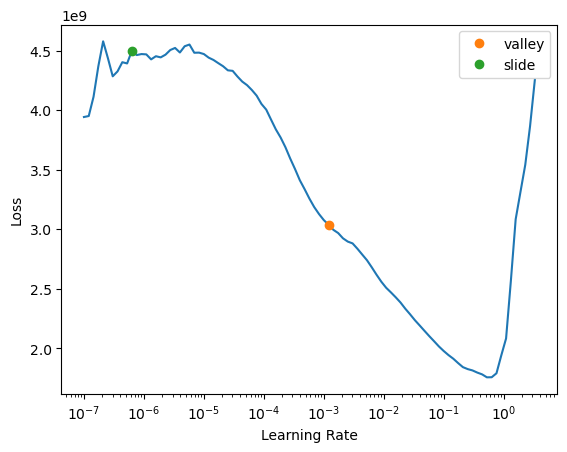

In [43]:
def MSE(yhat,y):
  return torch.mean(torch.square(yhat-y))
def RMSE(yhat,y):
  return torch.sqrt(MSE(yhat,y))
learn = fastai.tabular_learner(dls,y_range=(df.price.min()*0.9, df.price.max()*1.1),loss_func=MSE,metrics=RMSE)
learn.lr_find(suggest_funcs=(fastai.valley,fastai.slide))


In [162]:
learn = fastai.tabular_learner(
  dls,y_range=(df.price.min()*0.9, df.price.max()*1.1),
  loss_func=MSE,metrics=RMSE,
  #cbs=[fastai.SaveModelCallback(),fastai.EarlyStoppingCallback(patience=5)]
)
learn.fit(100,lr=1e-2)



epoch,train_loss,valid_loss,RMSE,time
0,7457548288.000000,2445532672.000000,49452.328125,00:00
1,6317754368.000000,1414824704.000000,37614.160156,00:00
2,4655127552.000000,2023538944.000000,44983.761719,00:00
3,3726135808.000000,1130475776.000000,33622.546875,00:00
4,3018431488.000000,677434496.000000,26027.572266,00:00
5,2585510400.000000,577821376.000000,24037.916016,00:00
6,2239911424.000000,1308064128.000000,36167.167969,00:00
7,1982802816.000000,896107712.000000,29935.058594,00:00
8,1752283392.000000,433769760.000000,20827.142578,00:00
9,1567990016.000000,447348448.000000,21150.613281,00:00


In [78]:
learn.validate()
learn.save_model('./model1.pkl')

Better model found at epoch 0 with valid_loss value: 16797.6953125.


In [106]:
df2 = df.drop('price',axis=1)
#df.iloc[0:60]
errs = torch.tensor([0.])
for i in range(60):
  _, yPred, _ = learn.predict(df.iloc[i])
  errs.add_(yPred.sub(df.price[i]).square())
errs.div_(60.).sqrt()
  

tensor([16797.6973])

In [222]:
row = df.drop('price', axis=1).iloc[0].copy()
cats = ['floor', 'area', 'year', 'lease', 'date']
for cat in cats:
  row[cat] = df[cat].median()
latMin, latMax = df.lat.min(),df.lat.max()
latLeft = latMin - (latMax-latMin)/10
latRight = latMax + (latMax-latMin)/10
longMin, longMax = df.long.min(),df.long.max()
longLeft = longMin - (longMax-longMin)/10
longRight = longMax + (longMax-longMin)/10
n1 = 10
n2 = 6
longs = np.linspace(longLeft, longRight, n1)
lats = np.linspace(latLeft, latRight, n2)
prices = np.ndarray((n2,n1))
for i,lat in enumerate(lats):
  row['lat'] = lat
  for j,long in enumerate(longs):
    row['long'] = long
    _, yPred, _ = learn.predict(row)
    prices[i][j] = yPred.item()

prices


array([[396333.65625, 387579.8125 , 378703.5625 , 371300.53125, 366663.125  , 368954.96875, 374794.75   , 382123.59375,
        390601.     , 396251.46875],
       [391721.25   , 383359.15625, 373317.8125 , 363295.25   , 358446.     , 364803.25   , 373001.25   , 381307.375  ,
        390163.8125 , 397164.9375 ],
       [381068.65625, 372116.875  , 362858.03125, 357809.125  , 360316.96875, 366404.84375, 376112.     , 386767.625  ,
        394912.78125, 399893.625  ],
       [353618.5    , 347613.875  , 345353.875  , 343191.25   , 346976.9375 , 356668.15625, 368948.625  , 382795.46875,
        394760.75   , 403293.125  ],
       [344592.375  , 343739.6875 , 343328.1875 , 344121.03125, 346178.1875 , 352979.1875 , 361597.84375, 368997.1875 ,
        378456.9375 , 388670.1875 ],
       [339230.0625 , 340445.59375, 341709.4375 , 344203.3125 , 347365.15625, 351002.5625 , 355090.125  , 359353.46875,
        365984.46875, 372865.59375]])

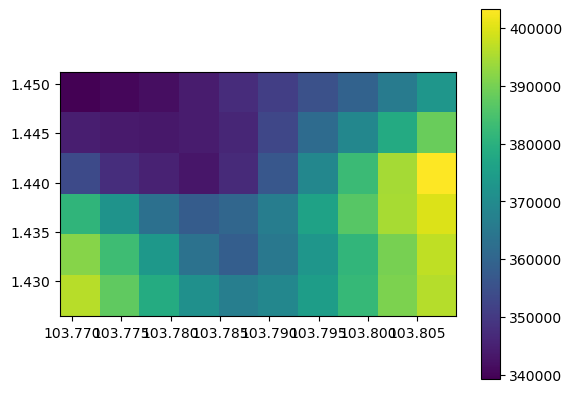

In [223]:
import matplotlib.pyplot as plt
import numpy as np

#plt.style.use('_mpl-gallery-nogrid')

# make data
X, Y = np.meshgrid(np.linspace(-3, 3, 5), np.linspace(-3, 3, 5))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig,ax=plt.subplots()
shw = ax.imshow(prices, extent=[longLeft, longRight, latLeft, latRight], origin='lower')
bar = plt.colorbar(shw)
plt.show()

In [154]:
np.set_printoptions(linewidth=130)
df.describe()


,floor,area,year,lease,price,date,lat,long
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,7.609121,68.589577,1997.941368,74.581705,372572.586319,738459.328990,1.438360,103.785222
std,5.095524,3.940027,17.531200,17.607482,53452.277518,102.674016,0.005203,0.012191
min,2.000000,60.000000,1974.000000,50.333333,248888.000000,738276.000000,1.428520,103.772100
25%,5.000000,67.000000,1981.000000,57.750000,324500.000000,738368.000000,1.434370,103.774800
50%,8.000000,68.000000,1993.000000,69.666667,375000.000000,738460.000000,1.438640,103.778490
75%,11.000000,68.000000,2018.000000,94.416667,418444.000000,738552.000000,1.441910,103.797670
max,32.000000,88.000000,2018.000000,95.250000,490000.000000,738641.000000,1.449130,103.805610


In [169]:
def dd2dms(deg):
    d = int(deg)
    md = abs(deg - d) * 60
    m = int(md)
    sd = (md - m) * 60
    return [d, m, sd]
  
(dd2dms(df.long.min()), dd2dms(df.long.max()), dd2dms(df.lat.min()), dd2dms(df.lat.max()), )
dd2dms(df.lat.max()-df.lat.min())

[0, 1, 14.196000000000062]

In [198]:
df.idxmax()
df.iloc[45]

np.amax(prices)
i = prices.argmax()
prices[i//30][i%30]
print(longs[i//30], lats[i%30],i//30, i%30)
df.iloc[45]


103.808961 1.4392514137931034 29 15


floor        11.00000
area         71.00000
year       2017.00000
lease        93.75000
price    490000.00000
date     738580.00000
lat           1.44135
long        103.79861
Name: 45, dtype: float64

In [203]:
largest = df.nlargest(30,'price')
smallest = df.nsmallest(30,'price')

lat_small = smallest.lat.mean()
long_small = smallest.long.mean()

lat_large = largest.lat.mean()
long_large = largest.long.mean()

print(f"{long_small},{lat_small} vs {long_large},{lat_large}")
print(f"{long_small-long_large} vs {lat_small-lat_large}")
df.describe()


103.77563800000001,1.4414559999999998 vs 103.79616333333334,1.4349136666666664
-0.020525333333324625 vs 0.006542333333333428


,floor,area,year,lease,price,date,lat,long
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,7.609121,68.589577,1997.941368,74.581705,372572.586319,738459.328990,1.438360,103.785222
std,5.095524,3.940027,17.531200,17.607482,53452.277518,102.674016,0.005203,0.012191
min,2.000000,60.000000,1974.000000,50.333333,248888.000000,738276.000000,1.428520,103.772100
25%,5.000000,67.000000,1981.000000,57.750000,324500.000000,738368.000000,1.434370,103.774800
50%,8.000000,68.000000,1993.000000,69.666667,375000.000000,738460.000000,1.438640,103.778490
75%,11.000000,68.000000,2018.000000,94.416667,418444.000000,738552.000000,1.441910,103.797670
max,32.000000,88.000000,2018.000000,95.250000,490000.000000,738641.000000,1.449130,103.805610


In [209]:
(prices[0].mean(),prices[15].mean(),prices[29].mean())

(367932.8770833333, 358004.8229166667, 394525.9708333333)